# Raka Satria Efendi

# MC009D5Y0313

# **1. Perkenalan Dataset**


Dataset ini berasal dari transaksi aktual yang terjadi antara tahun 2010 hingga 2011 dan tersedia secara publik melalui UCI Machine Learning Repository. Biasanya, dataset e-commerce bersifat eksklusif dan sulit ditemukan secara terbuka, sehingga keberadaan dataset ini menjadi sumber yang berharga bagi penelitian dan pengembangan model machine learning dalam konteks perdagangan daring.

Dataset "Online Retail" mencatat semua transaksi yang berlangsung antara tanggal 1 Desember 2010 hingga 9 Desember 2011 dari sebuah perusahaan retail daring berbasis di Inggris. Perusahaan ini berfokus pada penjualan hadiah unik untuk berbagai kesempatan. Sebagian besar pelanggan yang tercatat dalam dataset ini adalah pedagang grosir (wholesalers), menjadikannya representatif untuk menganalisis pola pembelian dalam skala besar.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to the dataset in Google Drive
file_path = '/content/drive/MyDrive/e-commerce-dataset/data-ecommerce.csv'

# Load dataset
df = pd.read_csv(file_path, encoding="ISO-8859-1")

Mounted at /content/drive


In [4]:
print(f'Jumlah baris dalam dataset: {df.shape[0]}')

Jumlah baris dalam dataset: 541909


In [5]:
# Display the first few rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data

In [6]:
display(df.head())
display(df.info())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

## 2. Menangani Data yang Hilang

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
num_rows = df.shape[0]
print(f'Jumlah baris dalam dataset: {num_rows}')

Jumlah baris dalam dataset: 541909


## Check Data Mengandung null, NaN, dan duplicate

In [9]:
# Mengecek jumlah nilai null (NaN) dalam dataset
print("Jumlah nilai null per kolom:")
print(df.isnull().sum())

Jumlah nilai null per kolom:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:
# Hapus baris yang tidak punya CustomerID
df_cleaned = df.dropna(subset=['CustomerID'])

# Isi Description yang kosong dengan 'Unknown' (opsional)
df_cleaned.loc[:, 'Description'] = df_cleaned['Description'].fillna('Unknown')

##  3. Analisis Distribusi dan Korelasi

### Statistik Deskriptif:

In [11]:
print(df_cleaned.describe())  # Statistik deskriptif

            Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [12]:
# Cek jumlah transaksi dengan nilai Quantity <= 0 atau UnitPrice <= 0
df_cleaned[(df_cleaned['Quantity'] <= 0) | (df_cleaned['UnitPrice'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
# Hapus transaksi dengan Quantity <= 0 atau UnitPrice <= 0
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

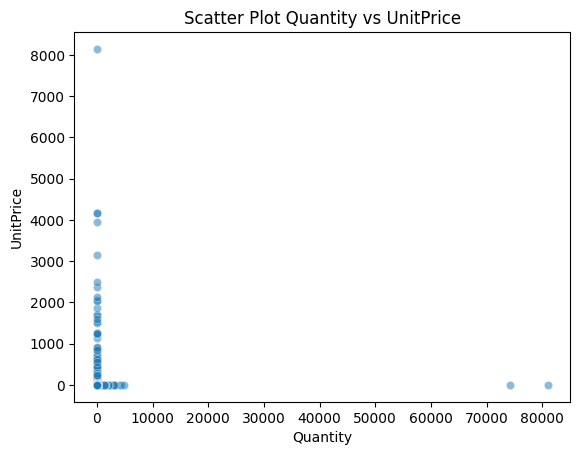

In [14]:
sns.scatterplot(data=df_cleaned, x='Quantity', y='UnitPrice', alpha=0.5)
plt.title('Scatter Plot Quantity vs UnitPrice')
plt.show()

### Korelasi Antar Variabel:

In [15]:
# Ubah CustomerID ke tipe integer (biar bisa dihitung korelasinya)
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)

In [16]:
from sklearn.preprocessing import LabelEncoder

# Buat salinan dataset untuk eksperimen
df_corr = df_cleaned.copy()

# Encode kolom 'Country'
label_encoder = LabelEncoder()
df_corr['Country_Encoded'] = label_encoder.fit_transform(df_corr['Country'])

# Cek hasil encoding
df_corr[['Country', 'Country_Encoded']].head()


,Country,Country_Encoded
0,United Kingdom,35
1,United Kingdom,35
2,United Kingdom,35
3,United Kingdom,35
4,United Kingdom,35


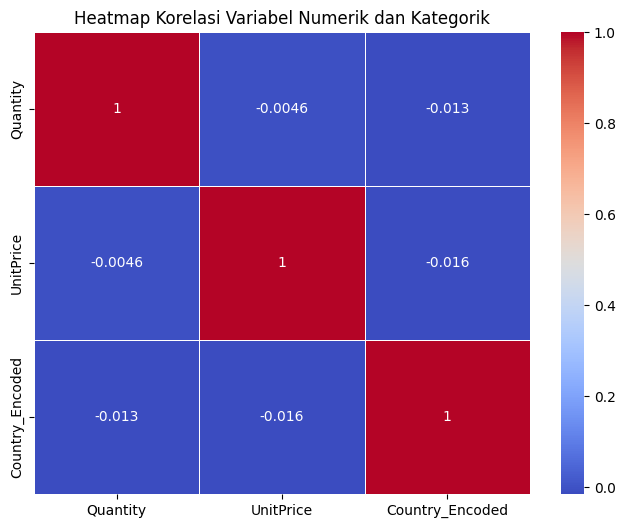

In [17]:
# Pilih kolom numerik dan Country yang sudah diencode
numerical_cols = ['Quantity', 'UnitPrice', 'Country_Encoded']

# Hitung korelasi menggunakan Pearson
correlation_matrix = df_corr[numerical_cols].corr()

# Visualisasi dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Numerik dan Kategorik')
plt.show()


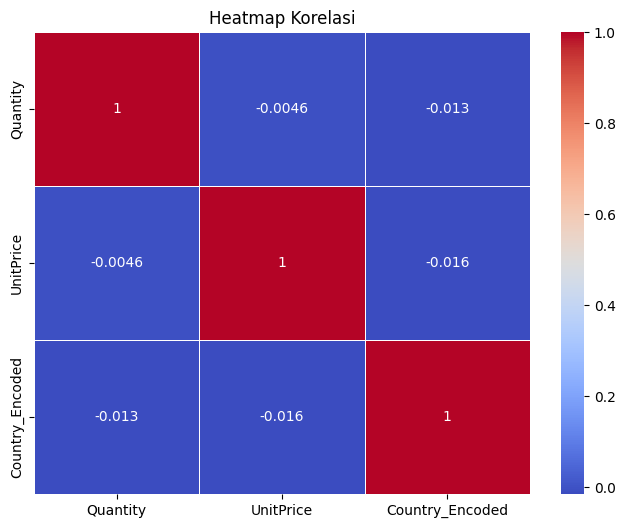

In [18]:
# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

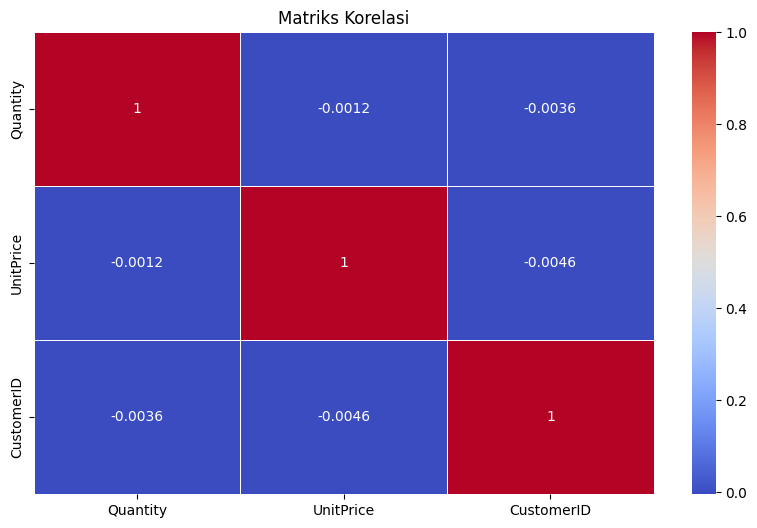

In [19]:
# 🔹 Ambil hanya kolom numerik untuk heatmap korelasi
numerical_df = df.select_dtypes(include=['number'])

# 🔹 Buat heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

## 4. Visualisasi Data

### Distribusi Variabel Numerik:

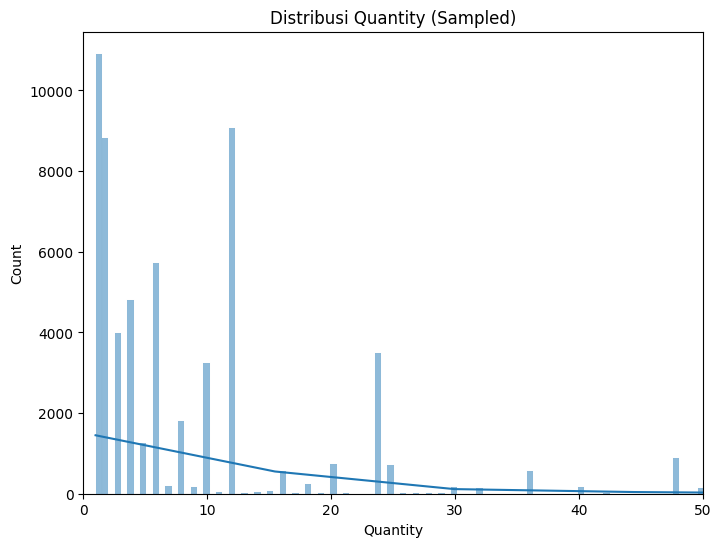

<Figure size 640x480 with 0 Axes>

In [20]:
# Sampling 15% data
sampled_df = df_cleaned.sample(frac=0.15, random_state=42)

# Buat plot
fig, ax = plt.subplots(figsize=(8, 6))

# Histogram Quantity dengan batas X
sns.histplot(sampled_df['Quantity'], kde=True, ax=ax)
ax.set_title('Distribusi Quantity (Sampled)')
ax.set_xlim(0, 50)
plt.show()  # Batasi rentang X agar lebih terlihat jelas

plt.tight_layout()
plt.show()

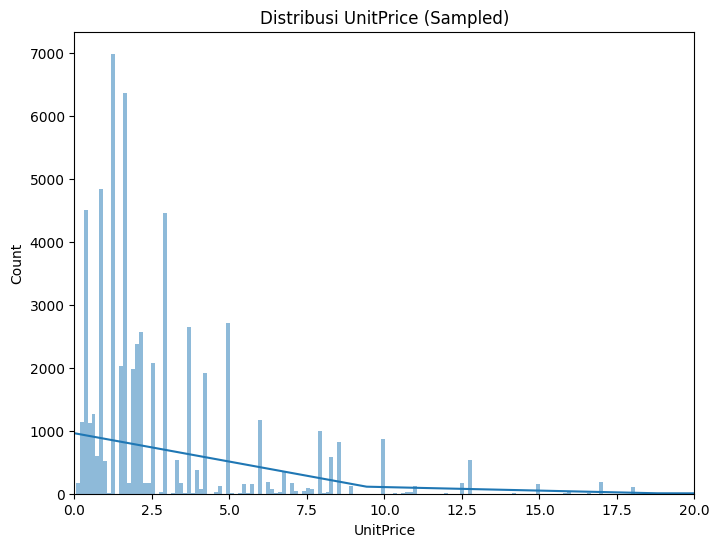

<Figure size 640x480 with 0 Axes>

In [21]:
# Buat plot
fig, ax = plt.subplots(figsize=(8, 6))

# Histogram UnitPrice dengan batas X
sns.histplot(sampled_df['UnitPrice'], kde=True, ax=ax)
ax.set_title('Distribusi UnitPrice (Sampled)')
ax.set_xlim(0, 20) # Batasi rentang X
plt.show()

plt.tight_layout()
plt.show()

### Pairplot untuk Melihat Hubungan Antar Variabel:

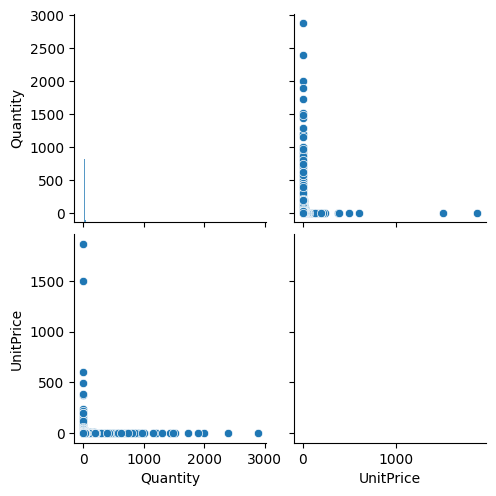

In [22]:
# Pairplot untuk fitur yang dipilih
sns.pairplot(sampled_df[['Quantity', 'UnitPrice','Country']])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [23]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [24]:
num_rows = df_cleaned.shape[0]
print(f'Jumlah baris dalam dataset: {num_rows}')

Jumlah baris dalam dataset: 397884


In [25]:
# Drop kolom CustomerID dari dataset
df_cleaned = df_cleaned.drop('CustomerID', axis=1)

# Cek apakah CustomerID sudah terhapus
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


## 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [26]:
# Cek jumlah missing values
df_cleaned.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [27]:
# Isi nilai kosong di kolom Description dengan 'Unknown'
df_cleaned['Description'] = df_cleaned['Description'].fillna('Unknown')

## 2. Menghapus Data Duplikat

In [28]:
# Cek duplikasi
duplicates = df_cleaned.duplicated()
print(f"Jumlah duplikasi: {duplicates.sum()}")

Jumlah duplikasi: 5192


In [29]:
# Hapus duplikasi
df_cleaned = df_cleaned.drop_duplicates()

## 3. Deteksi dan Penanganan Outlier

In [30]:
# Fungsi untuk menangani outlier dengan metode IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Terapkan pada kolom Quantity dan UnitPrice
df_cleaned = remove_outliers(df_cleaned, 'Quantity')
df_cleaned = remove_outliers(df_cleaned, 'UnitPrice')

In [31]:
before = df_cleaned.shape[0]
df_cleaned = remove_outliers(df_cleaned, 'Quantity')
df_cleaned = remove_outliers(df_cleaned, 'UnitPrice')
after = df_cleaned.shape[0]
print(f"Jumlah data sebelum outlier removal: {before}")
print(f"Jumlah data setelah outlier removal: {after}")
print(f"Jumlah outlier yang dihapus: {before - after}")

Jumlah data sebelum outlier removal: 333234
Jumlah data setelah outlier removal: 317994
Jumlah outlier yang dihapus: 15240


In [32]:
# Apakah dataset awal berbasis transaksi per invoice?
print("Jumlah InvoiceDate unik:", df_cleaned['InvoiceDate'].nunique())

Jumlah InvoiceDate unik: 15613


## 4. Pembuatan Fitur untuk Clustering

In [33]:
# Buat kolom Monetary (Total Belanja)
df_cleaned['Monetary'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
print("Kolom Monetary berhasil dibuat!")

Kolom Monetary berhasil dibuat!


In [34]:
print("Kolom yang tersedia di df_cleaned:", df_cleaned.columns.tolist())

Kolom yang tersedia di df_cleaned: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country', 'Monetary']


In [35]:
# Cari semua kolom yang berkaitan dengan Country
country_cols = [col for col in df_cleaned.columns if col.startswith('Country_')]

# Buat dataframe baru untuk menyimpan total Monetary per negara
monetary_per_country = {}

for col in country_cols:
    country_name = col.replace('Country_', '')  # Ambil nama negara
    monetary_per_country[country_name] = df_cleaned.loc[df_cleaned[col] == 1, 'Monetary'].sum()

# Ubah jadi DataFrame
monetary_df = pd.DataFrame(monetary_per_country.items(), columns=['Country', 'Total_Monetary'])

# Cek hasil
print(monetary_df.head())


Empty DataFrame
Columns: [Country, Total_Monetary]
Index: []


In [36]:
#  1️ Pastikan InvoiceDate bertipe datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# 2️ Tentukan snapshot_date (satu hari setelah transaksi terakhir)
snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)

#  3️ RFM Berbasis Tanggal Transaksi (InvoiceDate)
rfm = df_cleaned.groupby('InvoiceDate').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Quantity': 'sum',  # Total Quantity
    'UnitPrice': 'mean'  # Avg Unit Price
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AvgUnitPrice'
})

#  4️ Buat fitur Monetary (Total Belanja)
df_cleaned['Monetary'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

#  5️ Gunakan One-Hot Encoding untuk menghitung Monetary per negara
country_cols = [col for col in df_cleaned.columns if col.startswith('Country_')]

#  6️ Buat dictionary untuk menyimpan nilai Monetary berdasarkan One-Hot Encoding
monetary_per_country = {}

for col in country_cols:
    monetary_per_country[col] = df_cleaned.loc[df_cleaned[col] == 1, 'Monetary'].sum()

#  7️ Konversi dictionary ke DataFrame
monetary_df = pd.DataFrame(monetary_per_country.items(), columns=['Country_Encoded', 'Monetary'])

#  8️ Tambahkan nilai Monetary langsung ke RFM
rfm['Monetary'] = monetary_df['Monetary'].sum()  # Karena RFM tidak punya Country, kita tambahkan langsung

#  9️ Buat kolom Frequency (1 transaksi per tanggal)
rfm['Frequency'] = 1

#  10 Reset index agar InvoiceDate jadi kolom biasa
rfm.reset_index(inplace=True)

#  Cek hasil RFM
rfm.head()

,InvoiceDate,Recency,Frequency,TotalQuantity,AvgUnitPrice,Monetary
0,2010-12-01 08:26:00,374,1,38,3.286667,0
1,2010-12-01 08:28:00,374,1,12,1.850000,0
2,2010-12-01 08:34:00,374,1,50,3.790000,0
3,2010-12-01 08:45:00,374,1,362,2.105294,0
4,2010-12-01 09:01:00,374,1,12,1.850000,0


Fitur yang dihasilkan:

Recency: Berapa hari sejak transaksi terakhir.

Frequency: Berapa kali pelanggan bertransaksi.

TotalQuantity: Total barang yang dibeli pelanggan.

AvgUnitPrice: Rata-rata harga barang yang dibeli pelanggan.

Monetary: Total uang yang dihabiskan pelanggan.


In [37]:
# Cek jumlah baris sebelum RFM
print("Jumlah baris sebelum RFM:", df_cleaned.shape[0])

# Cek jumlah baris setelah RFM
print("Jumlah baris setelah RFM:", rfm.shape[0])


Jumlah baris sebelum RFM: 317994
Jumlah baris setelah RFM: 15613


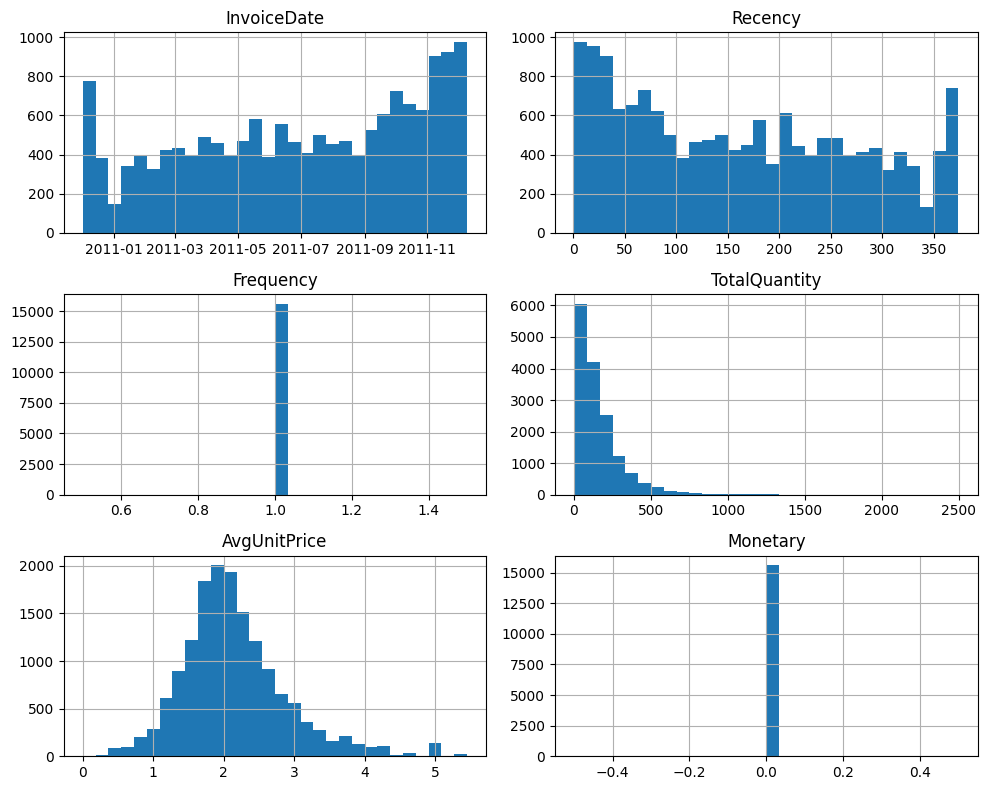

In [38]:
rfm.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

##  5. Encoding Data Kategorikal

In [39]:
# 🔹 1️ Cek semua kolom object (kategori)
object_cols = df_cleaned.select_dtypes(include='object').columns

# 🔹 2️ Cek jumlah kategori per kolom
category_counts = {col: df_cleaned[col].nunique() for col in object_cols}
print("Jumlah kategori per kolom:")
print(category_counts)


Jumlah kategori per kolom:
{'InvoiceNo': 16636, 'StockCode': 3226, 'Description': 3395, 'Country': 37}


In [40]:
#  3️ Kategorisasi kolom
low_cardinality_cols = [col for col, count in category_counts.items() if count <= 50]  # ≤ 50 kategori (One-Hot Encoding)
high_cardinality_cols = [col for col, count in category_counts.items() if count > 50]   # > 50 kategori (Frequency Encoding)

print(f"\n Kolom untuk One-Hot Encoding: {low_cardinality_cols}")
print(f" Kolom untuk Frequency Encoding: {high_cardinality_cols}")


 Kolom untuk One-Hot Encoding: ['Country']
 Kolom untuk Frequency Encoding: ['InvoiceNo', 'StockCode', 'Description']


In [41]:
#  5️ One-Hot Encoding untuk kategori sedikit
if low_cardinality_cols:
    df_cleaned = pd.get_dummies(df_cleaned, columns=low_cardinality_cols, drop_first=True)
    print(f" One-Hot Encoding diterapkan pada kolom: {low_cardinality_cols}")

# Cek jumlah kolom setelah One-Hot Encoding
print(f"\n Jumlah kolom setelah One-Hot Encoding: {df_cleaned.shape[1]}")
df_cleaned.head()

 One-Hot Encoding diterapkan pada kolom: ['Country']

 Jumlah kolom setelah One-Hot Encoding: 43


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Monetary,Country_Austria,Country_Bahrain,Country_Belgium,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [42]:
num_rows = df_cleaned.shape[0]
print(f'Jumlah baris dalam dataset: {num_rows}')

Jumlah baris dalam dataset: 317994


## 6. Normalisasi atau Standarisasi Fitur

In [43]:
# Cek semua kolom yang ada di rfm
print("Kolom yang ada di rfm:")
print(rfm.columns)

Kolom yang ada di rfm:
Index(['InvoiceDate', 'Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice',
       'Monetary'],
      dtype='object')


In [44]:
# Temukan semua kolom yang berhubungan dengan Country
country_cols = [col for col in rfm.columns if col.startswith('Country_')]
print(f"Kolom negara yang ditemukan: {country_cols}")

Kolom negara yang ditemukan: []


In [45]:
# Pilih fitur yang akan dinormalisasi
features_to_scale = ['Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice', 'Monetary'] + country_cols

# Cek apakah ada kolom yang hilang sebelum normalisasi
missing_cols = [col for col in features_to_scale if col not in rfm.columns]
if missing_cols:
    print(f" Kolom berikut tidak ditemukan di rfm: {missing_cols}")
else:
    print(" Semua fitur tersedia untuk normalisasi.")

 Semua fitur tersedia untuk normalisasi.


In [46]:
# Standarisasi fitur yang dipilih
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm[features_to_scale])

# Konversi hasil kembali ke DataFrame agar lebih mudah digunakan
scaled_rfm = pd.DataFrame(scaled_rfm, columns=features_to_scale)

print("Normalisasi berhasil dilakukan!")
scaled_rfm.head()

Normalisasi berhasil dilakukan!


,Recency,Frequency,TotalQuantity,AvgUnitPrice,Monetary
0,1.884232,0.0,-0.740325,1.503674,0.0
1,1.884232,0.0,-0.901512,-0.405155,0.0
2,1.884232,0.0,-0.665932,2.172429,0.0
3,1.884232,0.0,1.268306,-0.065958,0.0
4,1.884232,0.0,-0.901512,-0.405155,0.0


## 7. Feature Selection dengan Silhouette Score

In [47]:
# 🔹 Buat fitur tambahan berbasis rasio
rfm['Recency_Frequency_Ratio'] = rfm['Recency'] / (rfm['Frequency'] + 1)
rfm['Frequency_TotalQuantity_Ratio'] = rfm['Frequency'] / (rfm['TotalQuantity'] + 1)

# 🔹 Cek hasilnya
print("Fitur tambahan dibuat:")
print(rfm[['Recency_Frequency_Ratio', 'Frequency_TotalQuantity_Ratio']].head())

Fitur tambahan dibuat:
   Recency_Frequency_Ratio  Frequency_TotalQuantity_Ratio
0                    187.0                       0.025641
1                    187.0                       0.076923
2                    187.0                       0.019608
3                    187.0                       0.002755
4                    187.0                       0.076923


In [48]:
# List kombinasi fitur untuk diuji
feature_combinations = [
    #  Kombinasi dua fitur sederhana
    ['Recency', 'Frequency'],
    ['Recency', 'Monetary'],
    ['Frequency', 'TotalQuantity'],

    # Kombinasi tiga fitur
    ['Recency', 'Frequency', 'Monetary'],
    ['Recency', 'TotalQuantity', 'AvgUnitPrice'],
    ['Frequency', 'TotalQuantity', 'Monetary'],

    # Kombinasi empat fitur
    ['Recency', 'Frequency', 'TotalQuantity', 'Monetary'],
    ['Recency', 'Frequency', 'AvgUnitPrice', 'Monetary'],
    ['Frequency', 'TotalQuantity', 'AvgUnitPrice', 'Monetary'],

    # Kombinasi lima fitur
    ['Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice', 'Monetary'],

    # 🔹 Kombinasi dengan fitur tambahan
    ['Recency', 'Frequency', 'Recency_Frequency_Ratio'],
    ['Recency', 'Frequency', 'Monetary', 'Recency_Frequency_Ratio'],
    ['Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice', 'Monetary', 'Frequency_TotalQuantity_Ratio'],
    ['Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice', 'Monetary', 'Recency_Frequency_Ratio', 'Frequency_TotalQuantity_Ratio'],
]

# Fungsi untuk uji kombinasi fitur
def test_combination(features):
    # Standarisasi data agar setiap fitur punya skala yang sama
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(rfm[features])

    # Cari jumlah klaster optimal (coba 2-10 klaster)
    best_score = -1
    best_k = 0
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(scaled_data)
        score = silhouette_score(scaled_data, labels)

        # Simpan skor tertinggi
        if score > best_score:
            best_score = score
            best_k = k

    print(f"Fitur: {features} | Silhouette Score: {best_score:.2f} (Clusters: {best_k})")
    return best_score, best_k

# Uji semua kombinasi fitur
results = []
for features in feature_combinations:
    score, best_k = test_combination(features)
    results.append((features, score, best_k))

# Cari kombinasi fitur terbaik
best_result = max(results, key=lambda x: x[1])
print("\n Kombinasi Terbaik:", best_result)

Fitur: ['Recency', 'Frequency'] | Silhouette Score: 0.64 (Clusters: 2)
Fitur: ['Recency', 'Monetary'] | Silhouette Score: 0.64 (Clusters: 2)
Fitur: ['Frequency', 'TotalQuantity'] | Silhouette Score: 0.68 (Clusters: 2)
Fitur: ['Recency', 'Frequency', 'Monetary'] | Silhouette Score: 0.64 (Clusters: 2)
Fitur: ['Recency', 'TotalQuantity', 'AvgUnitPrice'] | Silhouette Score: 0.33 (Clusters: 4)
Fitur: ['Frequency', 'TotalQuantity', 'Monetary'] | Silhouette Score: 0.68 (Clusters: 2)
Fitur: ['Recency', 'Frequency', 'TotalQuantity', 'Monetary'] | Silhouette Score: 0.47 (Clusters: 3)
Fitur: ['Recency', 'Frequency', 'AvgUnitPrice', 'Monetary'] | Silhouette Score: 0.42 (Clusters: 3)
Fitur: ['Frequency', 'TotalQuantity', 'AvgUnitPrice', 'Monetary'] | Silhouette Score: 0.43 (Clusters: 3)
Fitur: ['Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice', 'Monetary'] | Silhouette Score: 0.33 (Clusters: 4)
Fitur: ['Recency', 'Frequency', 'Recency_Frequency_Ratio'] | Silhouette Score: 0.64 (Clusters: 2)
F

In [49]:
# Pilih fitur terbaik
best_features = ['Frequency', 'TotalQuantity']

# Standarisasi data hanya dengan fitur terbaik
scaler = StandardScaler()
scaled_best_features = scaler.fit_transform(rfm[best_features])

# Clustering dengan jumlah cluster optimal (2 cluster)
kmeans_best = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels_best = kmeans_best.fit_predict(scaled_best_features)

# Evaluasi silhouette score
score_best = silhouette_score(scaled_best_features, labels_best)
print(f"Silhouette Score (Fitur Terbaik): {score_best:.2f}")

# Tambahkan label cluster ke dalam dataframe RFM
rfm['Cluster'] = labels_best

# Lihat hasil clustering
rfm.head()

Silhouette Score (Fitur Terbaik): 0.68


,InvoiceDate,Recency,Frequency,TotalQuantity,AvgUnitPrice,Monetary,Recency_Frequency_Ratio,Frequency_TotalQuantity_Ratio,Cluster
0,2010-12-01 08:26:00,374,1,38,3.286667,0,187.0,0.025641,0
1,2010-12-01 08:28:00,374,1,12,1.850000,0,187.0,0.076923,0
2,2010-12-01 08:34:00,374,1,50,3.790000,0,187.0,0.019608,0
3,2010-12-01 08:45:00,374,1,362,2.105294,0,187.0,0.002755,1
4,2010-12-01 09:01:00,374,1,12,1.850000,0,187.0,0.076923,0


In [50]:
#  Gunakan jumlah cluster tetap = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Standarisasi fitur terbaik sebelum clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm[['Frequency', 'TotalQuantity']])

# Jalankan clustering
rfm['Cluster'] = kmeans_3.fit_predict(scaled_features)

In [51]:
#  Hitung statistik rata-rata untuk setiap cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'TotalQuantity': 'mean',
    'AvgUnitPrice': 'mean',
    'Monetary': 'mean',
}).round(2)

# Tambahkan jumlah transaksi per cluster
cluster_summary['TransactionCount'] = rfm['Cluster'].value_counts().sort_index()

# Tampilkan hasil ringkasan
print("\nRingkasan Tiap Klaster (3 Cluster):")
print(cluster_summary)


Ringkasan Tiap Klaster (3 Cluster):
         Recency  Frequency  TotalQuantity  AvgUnitPrice  Monetary  \
Cluster                                                              
0         167.48        1.0          77.95          2.28       0.0   
1         151.38        1.0         274.97          1.89       0.0   
2         139.14        1.0         697.20          1.85       0.0   

         TransactionCount  
Cluster                    
0                   10614  
1                    4393  
2                     606  


Recency (R): Seberapa baru pelanggan bertransaksi (lebih kecil lebih baik).

Frequency (F): Seberapa sering pelanggan bertransaksi (lebih besar lebih baik).

Monetary (M): Total uang yang dibelanjakan (lebih besar lebih baik).


<ipython-input-52-82b943a71845>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=rfm, palette="Set2")


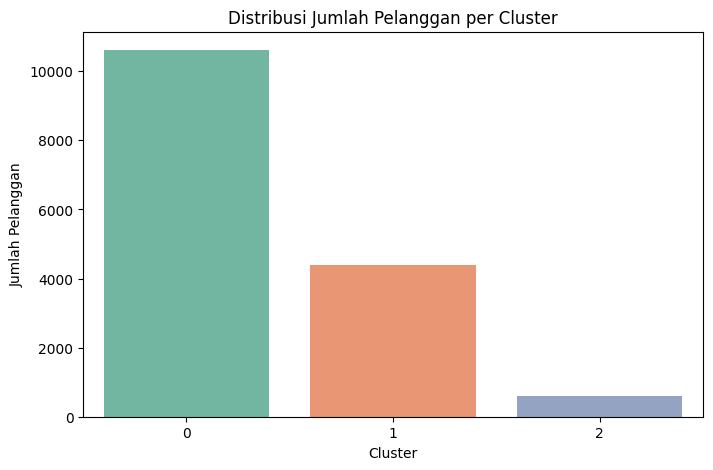

In [52]:
# Plot distribusi jumlah pelanggan per cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=rfm, palette="Set2")
plt.title("Distribusi Jumlah Pelanggan per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Pelanggan")
plt.show()

In [53]:
num_rows = df_cleaned.shape[0]
print(f'Jumlah baris dalam dataset: {num_rows}')

Jumlah baris dalam dataset: 317994


## 8. Evaluasi Akhir

In [54]:
# Inisialisasi dan fit model K-Means
optimal_k = 3  # Ganti dengan jumlah cluster optimal yang sudah kamu temukan
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
rfm['Cluster'] = kmeans.fit_predict(scaled_rfm)

# Ambil posisi centroids setelah clustering
centroids = kmeans.cluster_centers_

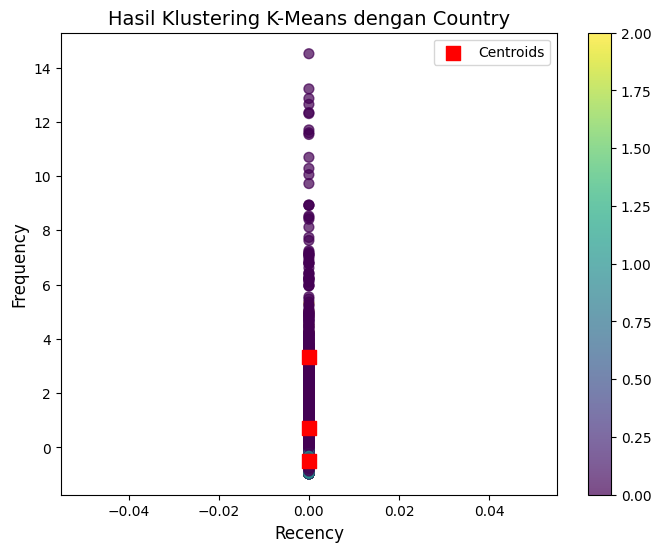

In [55]:
scaled_rfm = scaler.fit_transform(rfm[['Frequency', 'TotalQuantity']])

# Pastikan centroids sudah ada
centroids = kmeans_3.cluster_centers_

# Scatter plot hasil clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(scaled_rfm[:, 0], scaled_rfm[:, 1], c=rfm['Cluster'], cmap='viridis', s=50, alpha=0.7)

# Plot centroid dengan simbol kotak merah
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='s', s=100, label='Centroids')

# Tambahkan warna dan legenda
plt.colorbar(scatter)
plt.title('Hasil Klustering K-Means dengan Country', fontsize=14)
plt.xlabel('Recency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

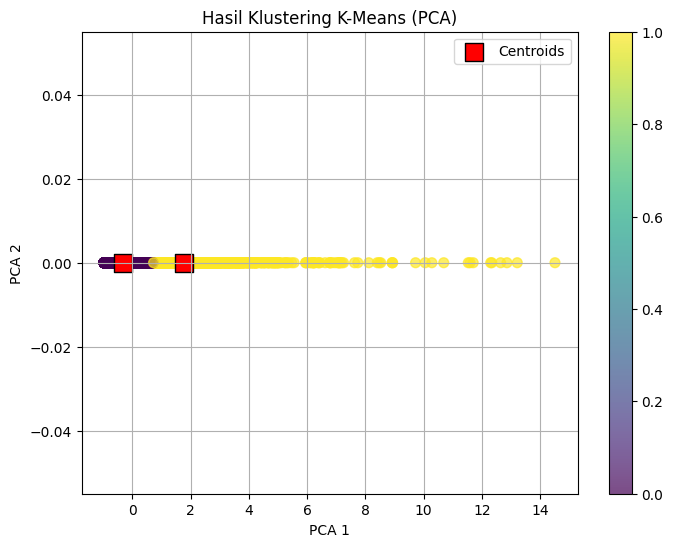

In [56]:
# Pastikan data sudah berbentuk numpy array
scaled_best_features = np.array(scaled_best_features)

# Reduksi dimensi ke 2D dengan PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_best_features)

# Pastikan label clustering sudah benar
labels_best = kmeans_best.labels_

# Transformasi centroid ke ruang PCA
centroids_pca = pca.transform(kmeans_best.cluster_centers_)

# Plot hasil PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_best, cmap='viridis', s=50, alpha=0.7)

# Plot centroid dalam ruang PCA
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='s', s=150, edgecolors='black', label='Centroids')

# Tambahkan elemen visualisasi
plt.colorbar(scatter)
plt.title('Hasil Klustering K-Means (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)  # Tambahkan grid agar lebih jelas
plt.show()

         Recency  Frequency  TotalQuantity  AvgUnitPrice  Monetary  \
Cluster                                                              
0         167.48        1.0          77.95          2.28       0.0   
1         151.38        1.0         274.97          1.89       0.0   
2         139.14        1.0         697.20          1.85       0.0   

         TransactionCount  
Cluster                    
0                   10614  
1                    4393  
2                     606  


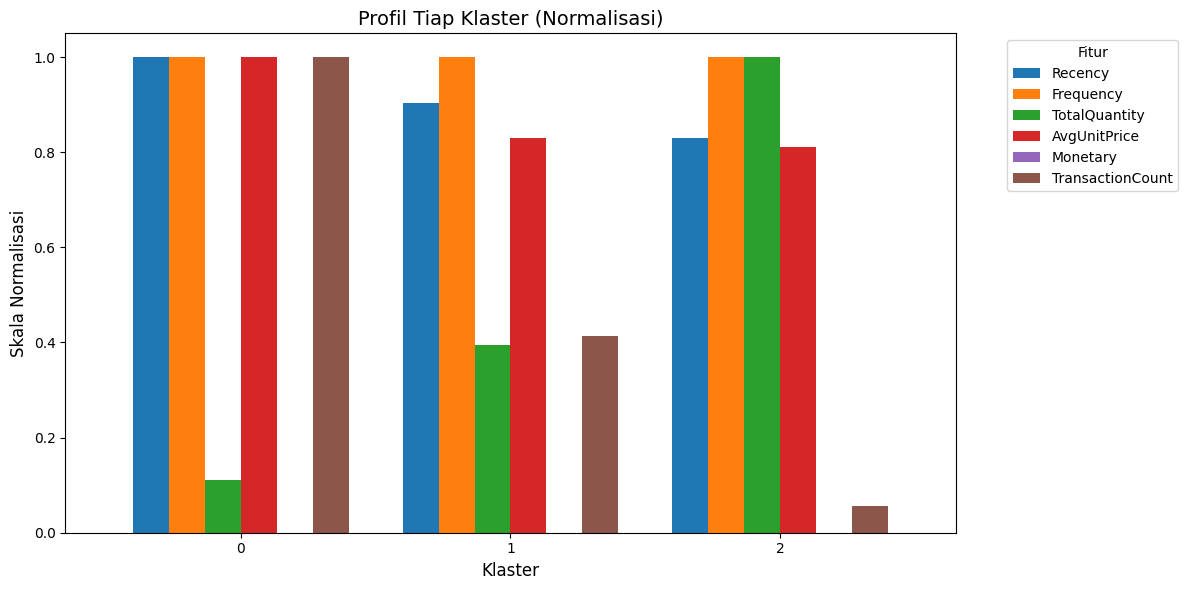

In [57]:
print(cluster_summary.head())  # Cek apakah data benar

# Saya lakukan normalisasi agar semua fitur dalam skala yang sama
normalized_summary = cluster_summary.div(cluster_summary.max())  # Dibagi nilai maksimum tiap fitur

# Plot ulang dengan skala normalisasi
fig, ax = plt.subplots(figsize=(12, 6))
normalized_summary.plot(kind='bar', ax=ax, width=0.8)

ax.set_title('Profil Tiap Klaster (Normalisasi)', fontsize=14)
ax.set_xlabel('Klaster', fontsize=12)
ax.set_ylabel('Skala Normalisasi', fontsize=12)
ax.legend(title='Fitur', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(cluster_summary.index, rotation=0)

plt.tight_layout()
plt.show()

In [58]:
# Jalankan K-Means dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels_2 = kmeans_2.fit_predict(scaled_best_features)

# Tambahkan label cluster ke dataset
rfm['Cluster'] = labels_2

In [59]:
# Cetak centroid tiap cluster
print("Centroid Tiap Cluster (2 Klaster):")
centroid_df = pd.DataFrame(kmeans_2.cluster_centers_, columns=best_features)
print(centroid_df)

Centroid Tiap Cluster (2 Klaster):
   Frequency  TotalQuantity
0        0.0      -0.320414
1        0.0       1.759681


In [60]:
# 🔹 Tambahkan label cluster ke DataFrame asli
rfm['Cluster_2'] = labels_2

# 🔹 Cek jumlah data per cluster
print("\nDistribusi Data per Cluster:")
print(rfm['Cluster_2'].value_counts())  # Gunakan Cluster_2

# 🔹 Cek centroid setelah clustering
print("\nCentroid Tiap Cluster (2 Klaster):")
centroid_df = pd.DataFrame(kmeans_2.cluster_centers_, columns=best_features)  # Gunakan kmeans_2
print(centroid_df)


Distribusi Data per Cluster:
Cluster_2
0    13183
1     2430
Name: count, dtype: int64

Centroid Tiap Cluster (2 Klaster):
   Frequency  TotalQuantity
0        0.0      -0.320414
1        0.0       1.759681


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [61]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Monetary,Country_Austria,Country_Bahrain,Country_Belgium,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [62]:
num_rows = df_cleaned.shape[0]
print(f'Jumlah baris dalam dataset: {num_rows}')

Jumlah baris dalam dataset: 317994


In [63]:
# Pilih fitur yang akan digunakan
selected_features = ['Frequency', 'TotalQuantity']

# Standarisasi fitur
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm[selected_features])

# Inisialisasi model dengan jumlah cluster awal
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_rfm)

# Simpan hasil clustering ke dalam DataFrame
rfm['Cluster'] = labels

# Cek hasil clustering
rfm.head()


,InvoiceDate,Recency,Frequency,TotalQuantity,AvgUnitPrice,Monetary,Recency_Frequency_Ratio,Frequency_TotalQuantity_Ratio,Cluster,Cluster_2
0,2010-12-01 08:26:00,374,1,38,3.286667,0,187.0,0.025641,0,0
1,2010-12-01 08:28:00,374,1,12,1.850000,0,187.0,0.076923,0,0
2,2010-12-01 08:34:00,374,1,50,3.790000,0,187.0,0.019608,0,0
3,2010-12-01 08:45:00,374,1,362,2.105294,0,187.0,0.002755,1,1
4,2010-12-01 09:01:00,374,1,12,1.850000,0,187.0,0.076923,0,0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [64]:
# Inisialisasi list untuk menyimpan metrik evaluasi
inertia = []
silhouette_scores = []

# Uji jumlah cluster dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(scaled_best_features)  # Sesuaikan dengan fitur terbaik yang dipilih

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_best_features, labels))

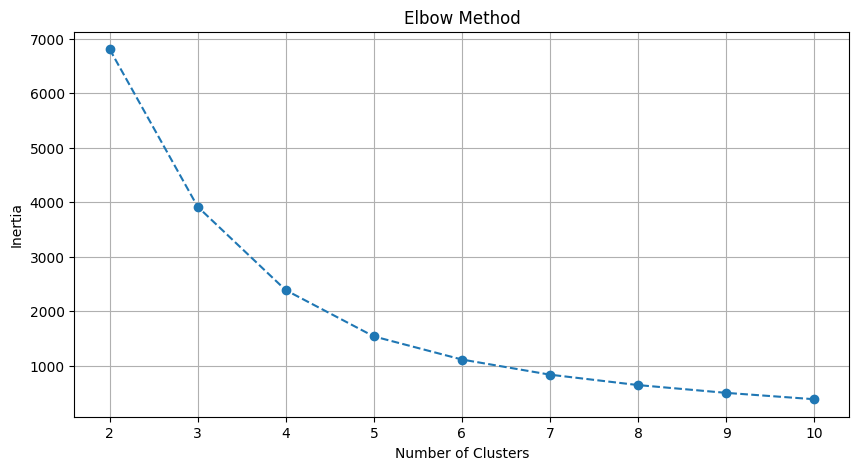

In [65]:
# Plot Elbow Method untuk menentukan jumlah cluster optimal
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

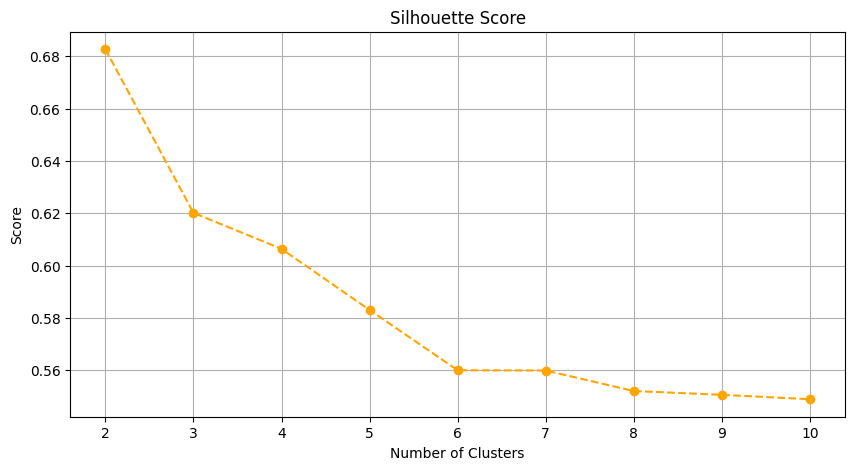

In [66]:
# Plot Silhouette Score untuk melihat kualitas clustering
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid()
plt.show()

In [67]:
# Pilih jumlah cluster terbaik berdasarkan Silhouette Score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # karena range mulai dari 2

print(f"Jumlah Cluster yang Digunakan: {optimal_k}, Silhouette Score: {silhouette_scores[optimal_k-2]:.2f}")

Jumlah Cluster yang Digunakan: 2, Silhouette Score: 0.68


In [68]:
# Jalankan K-Means dengan jumlah cluster yang dipilih
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
rfm['Cluster'] = kmeans_final.fit_predict(scaled_best_features)

# Tampilkan jumlah data di tiap cluster
print("Distribusi Jumlah Data per Cluster:")
print(rfm['Cluster'].value_counts().sort_index())

Distribusi Jumlah Data per Cluster:
Cluster
0    13183
1     2430
Name: count, dtype: int64


In [69]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# 🔹 Evaluasi menggunakan hasil clustering dengan 2 klaster
db_score = davies_bouldin_score(scaled_best_features, labels_2)  # ✅ Gunakan labels_2
ch_score = calinski_harabasz_score(scaled_best_features, labels_2)  # ✅ Gunakan labels_2

# 🔹 Cetak hasil evaluasi
print(f"Davies-Bouldin Score: {db_score:.2f}")  # Semakin kecil, semakin baik
print(f"Calinski-Harabasz Score: {ch_score:.2f}")  # Semakin besar, semakin baik

Davies-Bouldin Score: 0.58
Calinski-Harabasz Score: 20183.27


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [70]:
#  Feature Selection: Gunakan hanya 'Recency', 'Frequency', dan 'Monetary'
selected_features_opt = ['Frequency', 'TotalQuantity']
scaled_rfm_opt = scaler.fit_transform(rfm[selected_features_opt])

#  Clustering ulang dengan 2 klaster
kmeans_opt = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels_opt = kmeans_opt.fit_predict(scaled_rfm_opt)

#  Evaluasi dengan Silhouette Score
score_opt = silhouette_score(scaled_rfm_opt, labels_opt)

#  Cetak hasil evaluasi
print(f"Silhouette Score setelah Feature Selection (2 Klaster): {score_opt:.2f}")

Silhouette Score setelah Feature Selection (2 Klaster): 0.68


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

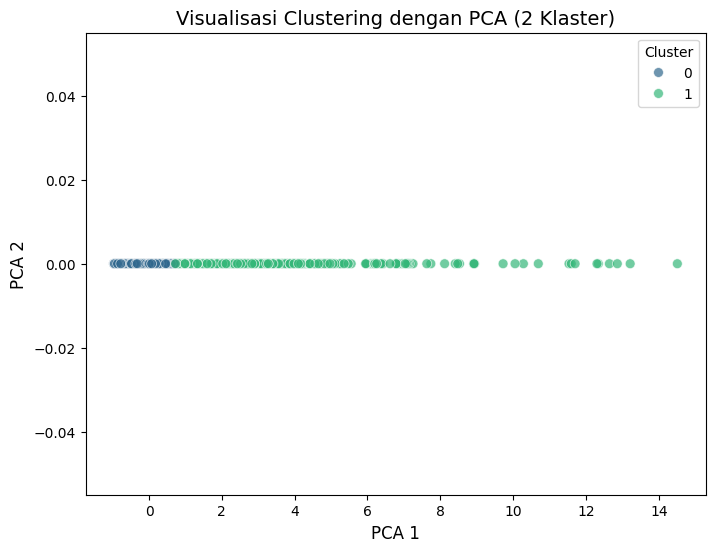

In [71]:
# Reduksi Dimensi ke 2D dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_rfm_opt)  # Gunakan dataset yang sudah dipilih

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_opt, palette='viridis', s=50, alpha=0.7)

# Tambahkan detail grafik
plt.title('Visualisasi Clustering dengan PCA (2 Klaster)', fontsize=14)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.legend(title="Cluster")
plt.show()

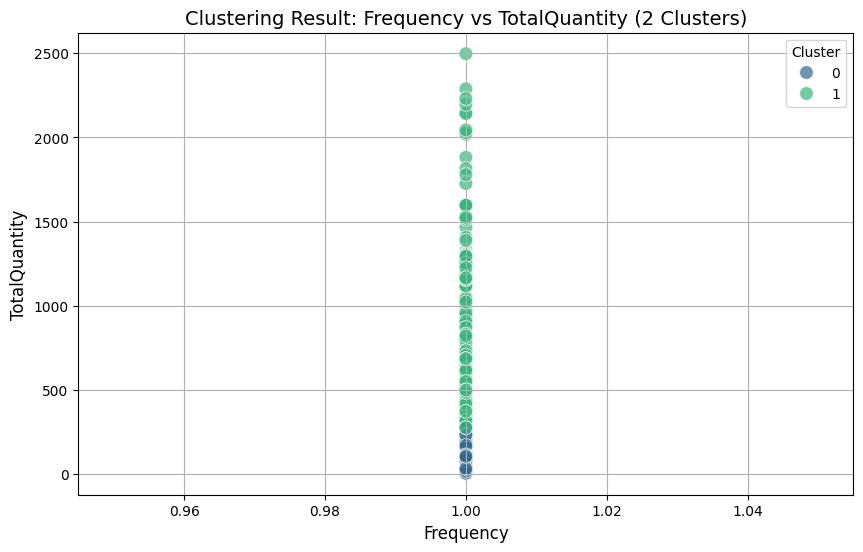

In [72]:
# 🔹 Visualisasi clustering berdasarkan Recency & Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm,
    x='Frequency',
    y='TotalQuantity',
    hue='Cluster_2',  # Sesuaikan dengan klaster terbaru (2 klaster)
    palette='viridis',
    s=100,
    alpha=0.7
)

# 🔹 Tambahkan detail untuk memperjelas visualisasi
plt.title('Clustering Result: Frequency vs TotalQuantity (2 Clusters)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('TotalQuantity', fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.grid(True)
plt.show()


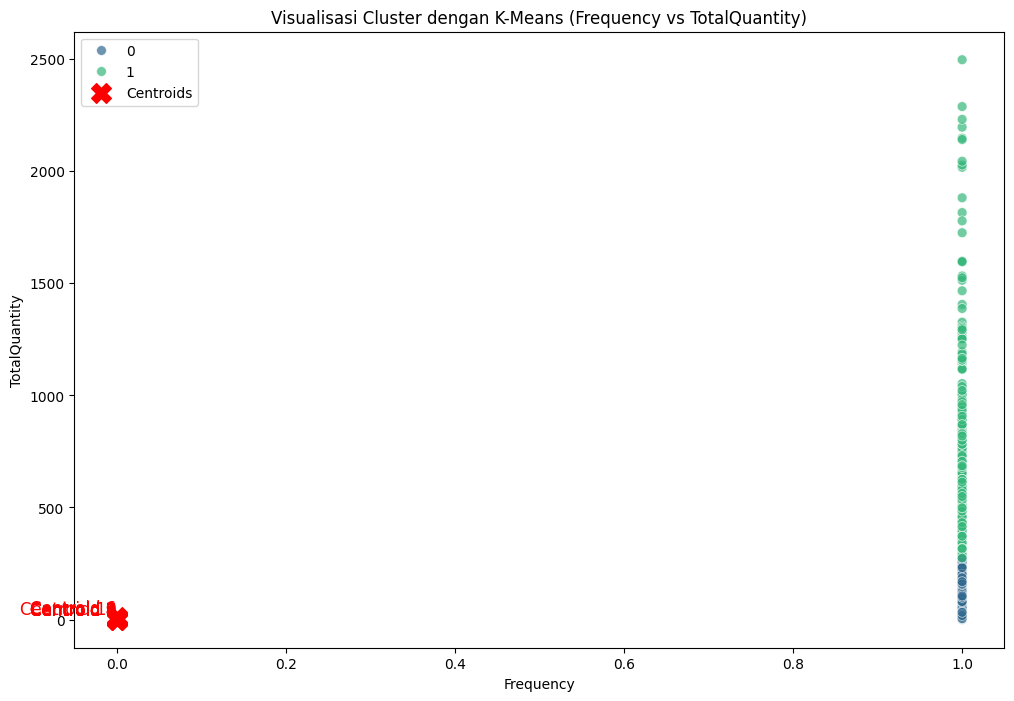

In [73]:
optimal_k = 2

# Ambil centroids (pusat cluster)
centroids = kmeans.cluster_centers_

# Pilih dua fitur utama untuk visualisasi
feature_x = "Frequency"
feature_y = "TotalQuantity"

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=rfm[feature_x],
    y=rfm[feature_y],
    hue=rfm["Cluster"],
    palette="viridis",
    s=50,
    alpha=0.7,
    edgecolor='w'
)

# Tambahkan titik centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='right', va='bottom', color='red')

# Tambahkan label dan judul
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f'Visualisasi Cluster dengan K-Means ({feature_x} vs {feature_y})')

plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [74]:
# Pilih fitur terbaik
best_features = ['Frequency', 'TotalQuantity']

# Standarisasi ulang fitur terbaik
scaler = StandardScaler()
scaled_best_features = scaler.fit_transform(rfm[best_features])

# Simpan hasil normalisasi ke DataFrame
df_normalized = pd.DataFrame(scaled_best_features, columns=best_features)

# Cek hasil normalisasi
df_normalized.head()

,Frequency,TotalQuantity
0,0.0,-0.740325
1,0.0,-0.901512
2,0.0,-0.665932
3,0.0,1.268306
4,0.0,-0.901512


In [75]:
# Jalankan K-Means dengan 2 cluster
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels = kmeans.fit_predict(scaled_best_features)

# Tambahkan label cluster ke df_normalized
df_normalized['Cluster'] = labels

# Cek apakah kolom 'Cluster' sudah ada
print(df_normalized.head())

   Frequency  TotalQuantity  Cluster
0        0.0      -0.740325        0
1        0.0      -0.901512        0
2        0.0      -0.665932        0
3        0.0       1.268306        1
4        0.0      -0.901512        0


In [76]:
# Inverse transform fitur terbaik
df_normalized[best_features] = scaler.inverse_transform(df_normalized[best_features])

# Cek hasil setelah inverse transform
df_normalized.head()

,Frequency,TotalQuantity,Cluster
0,1.0,38.0,0
1,1.0,12.0,0
2,1.0,50.0,0
3,1.0,362.0,1
4,1.0,12.0,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [77]:
# Inverse Transform untuk data numerik
df_normalized[best_features] = scaler.inverse_transform(df_normalized[best_features])

# Cek hasil setelah inverse transform
df_normalized.head()

,Frequency,TotalQuantity,Cluster
0,2.0,6286.964888,0
1,2.0,2093.063937,0
2,2.0,8222.611481,0
3,2.0,58549.422894,1
4,2.0,2093.063937,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [78]:
#  Buat salinan DataFrame asli
df_original = rfm.copy()

#  Gabungkan fitur yang sudah dinormalisasi kembali ke skala asli
df_original[best_features] = df_normalized[best_features]

#  Tambahkan kolom cluster
df_original['Cluster'] = df_normalized['Cluster']

#  Hitung rata-rata tiap fitur dalam setiap cluster
cluster_summary = df_original.groupby('Cluster')[best_features].mean().round(2)

#  Tampilkan hasil analisis karakteristik tiap cluster
print("\n Rata-rata Fitur per Cluster:")
print(cluster_summary)


 Rata-rata Fitur per Cluster:
         Frequency  TotalQuantity
Cluster                          
0              2.0       17161.13
1              2.0       71056.91


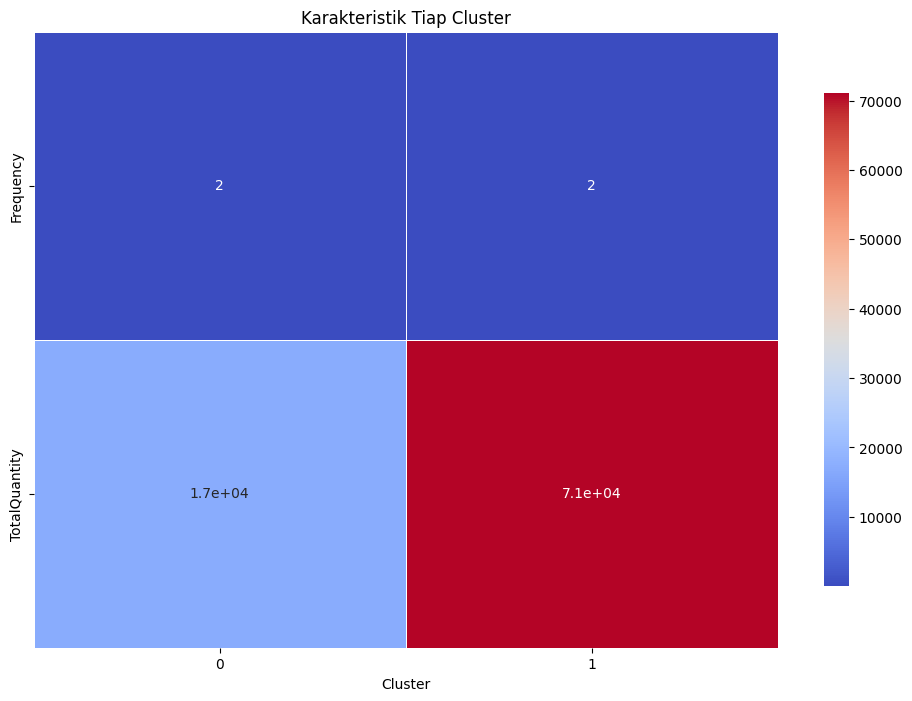

In [79]:
# Visualisasi perbandingan fitur antar cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Karakteristik Tiap Cluster')
plt.show()

In [80]:
cluster_map = {
    0: 'Pelanggan Transaksi Rendah',
    1: 'Pelanggan Transaksi Tinggi'
}

rfm['Cluster Label'] = rfm['Cluster'].map(cluster_map)

# Cek hasil
print(rfm[['Cluster', 'Cluster Label']].head())

   Cluster               Cluster Label
0        0  Pelanggan Transaksi Rendah
1        0  Pelanggan Transaksi Rendah
2        0  Pelanggan Transaksi Rendah
3        1  Pelanggan Transaksi Tinggi
4        0  Pelanggan Transaksi Rendah


In [81]:
num_rows = df_cleaned.shape[0]
print(f'Jumlah baris dalam dataset: {num_rows}')

Jumlah baris dalam dataset: 317994


1. Cluster 0 (Pelanggan Transaksi Rendah)

  - Pelanggan ini hanya melakukan rata-rata 2 transaksi dan membeli sekitar 17.161 unit barang.

  - Bisa jadi mereka adalah pelanggan ritel atau pelanggan baru yang hanya membeli sedikit.

  - Strategi bisnis:

    - Berikan promosi atau diskon untuk mendorong mereka membeli lebih sering.

    - Kirimkan email marketing atau loyalty program untuk meningkatkan engagement mereka.

2. Cluster 1 (Pelanggan Transaksi Tinggi)

  - Pelanggan ini juga hanya bertransaksi 2 kali, tetapi dalam jumlah yang sangat besar (71.056 unit barang).

  - Mereka bisa jadi grosir atau distributor yang membeli dalam jumlah banyak tetapi tidak sering.

  - Strategi bisnis:

    - Tawarkan harga khusus atau diskon bulk purchase untuk mempertahankan loyalitas mereka.

    - Sediakan layanan khusus, misalnya konsultasi produk atau personal account manager, untuk meningkatkan retensi.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0: Pelanggan Transaksi Rendah
- Rata-rata Frequency: 2.0 transaksi

- Rata-rata TotalQuantity: 17,161 unit

Analisis:
Cluster ini mencakup pelanggan yang melakukan transaksi dalam jumlah kecil, baik dalam jumlah pembelian maupun frekuensi transaksi.
Kemungkinan besar mereka adalah pelanggan ritel biasa atau pembeli baru yang hanya melakukan pembelian dalam jumlah terbatas.

Strategi Bisnis:

- Dorong mereka untuk berbelanja lebih sering dengan menawarkan diskon atau program loyalitas.

- Kirimkan promosi yang dipersonalisasi berdasarkan produk yang pernah mereka beli.

- Gunakan email marketing atau notifikasi untuk mengingatkan mereka agar kembali berbelanja.

##  Cluster 1: Pelanggan Transaksi Tinggi
- Rata-rata Frequency: 2.0 transaksi

- Rata-rata TotalQuantity: 71,056 unit

Analisis:
Pelanggan dalam cluster ini memiliki jumlah transaksi yang sama dengan cluster sebelumnya, tetapi membeli dalam jumlah yang jauh lebih besar.
Mereka kemungkinan adalah pedagang grosir, reseller, atau pelanggan korporat yang melakukan pembelian dalam skala besar.

Strategi Bisnis:
- Tawarkan diskon khusus atau harga grosir untuk mempertahankan loyalitas mereka.
- Berikan layanan prioritas, seperti pengiriman cepat atau dukungan pelanggan eksklusif.
- Pastikan stok barang selalu tersedia untuk memenuhi permintaan mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [82]:
num_rows = df_cleaned.shape[0]
print(f'Jumlah baris dalam dataset: {num_rows}')

Jumlah baris dalam dataset: 317994


In [83]:
# Simpan hasil clustering ke dalam file CSV
df_original.to_csv('Dataset_clustering.csv', index=False)

print("✅ Data berhasil diekspor ke 'Dataset_clustering.csv'")

✅ Data berhasil diekspor ke 'Dataset_clustering.csv'


In [84]:
from google.colab import files
files.download('Dataset_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>